<h1>Análisis del precío de la vivienda en Barcelona</h1>

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importamos el dataframe
df = pd.read_csv("Barcelona_Idealista.csv")


## Precio medio de las casas
Como podemos observar el distrito más caro es el de Sarría-Sant Gervasi con el precio medio superior al millón de euros, seguido Les Corts que tienen un precio aproximado del millón de euros, después el 3.er distrito más caro para vivir l'Eixample con precio medio de 600.000 € por vivienda como podemos ver el 3.er distrito más caro está casi a la mitad de precio que los 2 primeros. <br>
Los siguientes 3 distritos que son Ciutat Vella, Sant Martí, Gràcia se irán a los 400.000 € por vivienda. En las posiciones mas bajas tenemos a Horta-Guinardó, Sans-Montjuic, Sant Andreu que el precio de la vivienda estaría alrededor de los 300.000 € y por último tenemos a nou barris que el precio medio de la vivienda estaría alrededor de los 200.000 €

Text(0.5, 0, 'Distritos')

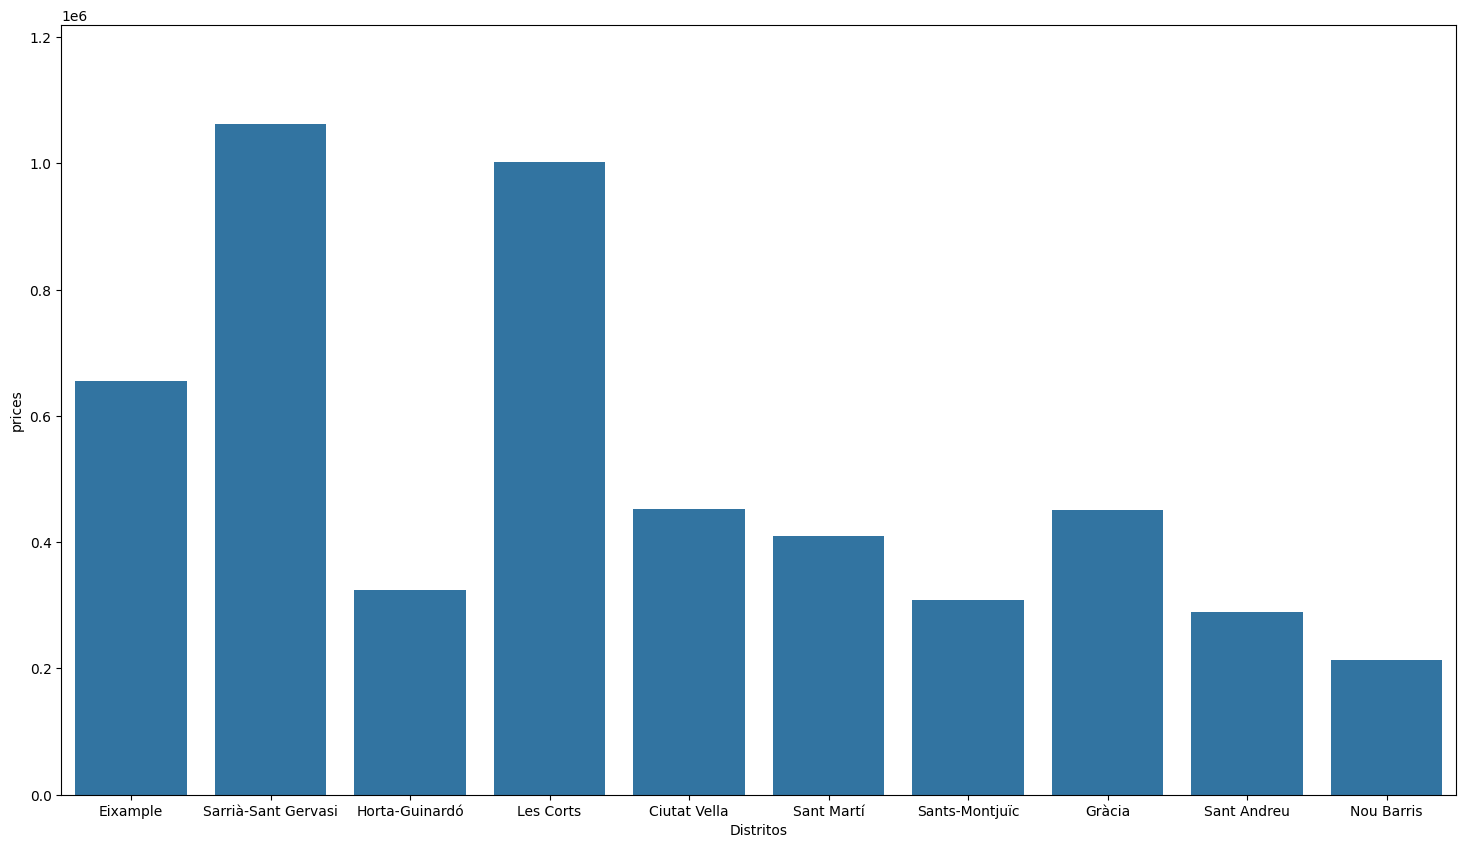

In [4]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x='district',y='prices',err_kws={'linewidth': 0})
plt.xlabel("Distritos")

Aquí podemos ver como las casas que tienen vistas al exterior son más caras en todos los barrios especialmente en los distritos más caros

Text(0.5, 0, 'Distritos')

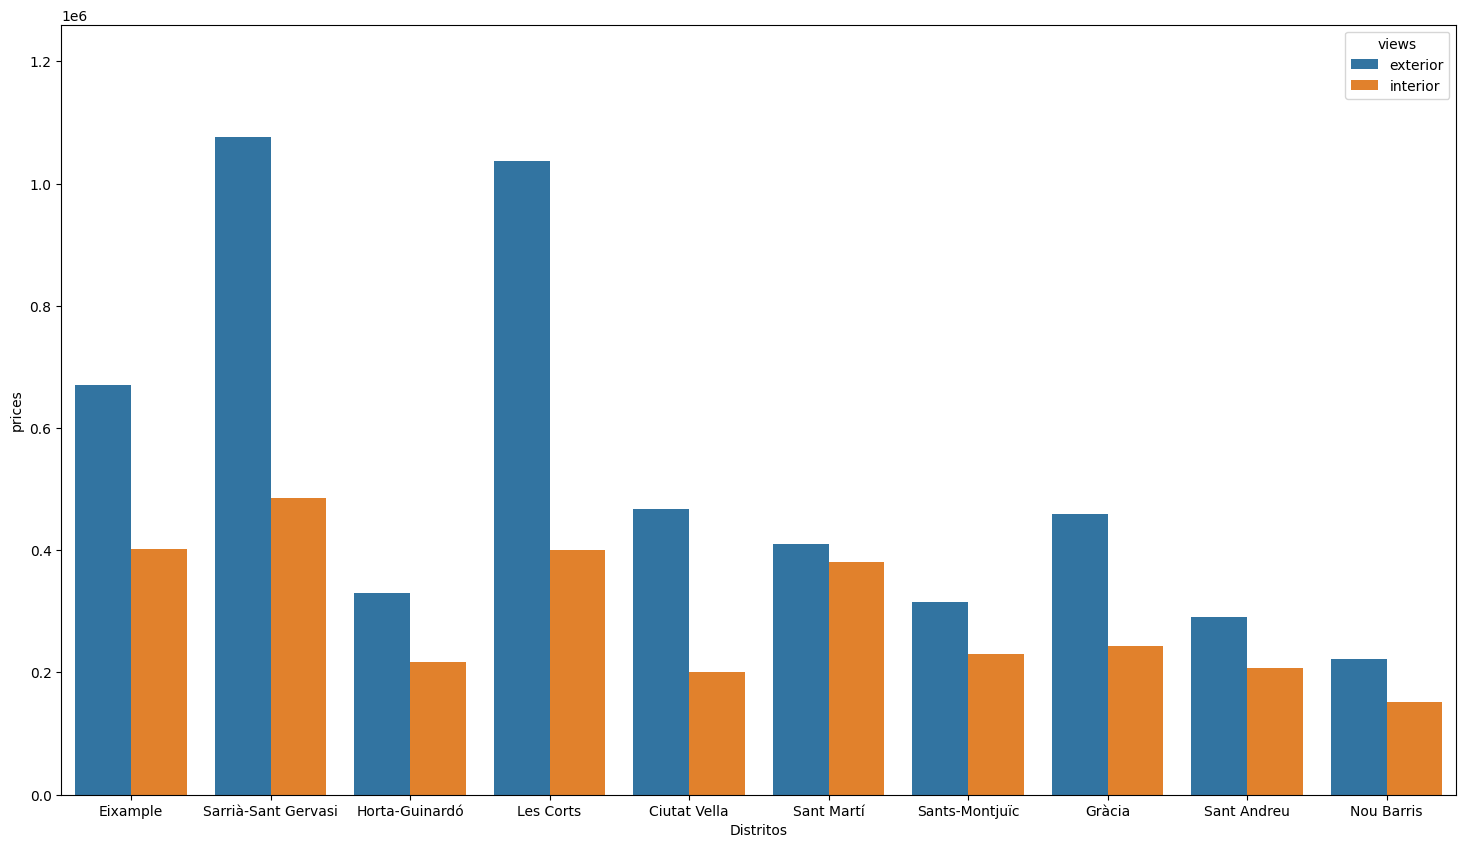

In [6]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x='district',y='prices',err_kws={'linewidth': 0},hue='views')
plt.xlabel("Distritos")

Hemos podido ver como las viviendas que no tienen ascensor en los barrios caros son más caros debido a que el tipo de vivienda de casa tienen más metros cuadrados que los apartamentos que son las principales viviendas que tienen ascensor

In [7]:
#Guardamos una variable con los distritos de clase alta , distritos de clase media y distritos de clase baja
df_caros=df[(df['district']=='Les Corts') | (df['district']=='Sarrià-Sant Gervasi')]
df_medio=df[(df['district']=='Eixample') | (df['district']=='Ciutat Vella')| (df['district']=='Gràcia') | (df['district']=='Sant Martí')]
df_barato=df[(df['district']=='Horta-Guinardó') | (df['district']=='Sants-Montjuic') | (df['district']=='Sant Andreu')| (df['district']=='Nou Barris')]
df_caros.groupby('type').count()

,id,city,district,neighborhood,condition,rooms,area_m2,lift,views,floor,prices
type,,,,,,,,,,,
Detached,34,34,34,34,34,34,34,34,34,34,34
Duplex,27,27,27,27,27,27,27,27,27,27,27
Flat,585,585,585,585,585,585,585,585,585,585,585
House,43,43,43,43,43,43,43,43,43,43,43
Penthouse,80,80,80,80,80,80,80,80,80,80,80
Semi-detached,5,5,5,5,5,5,5,5,5,5,5
Terraced,2,2,2,2,2,2,2,2,2,2,2


<h3>Precio medio del m2</h3>
Ahora haremos veremos la correlación que tiene el precio de la casa con los m2 haciendo un plot de regresión lineal que veremos que los 50m2 están a 200.000€ eso haria una media de 1.000.000/200=5000€ el m2



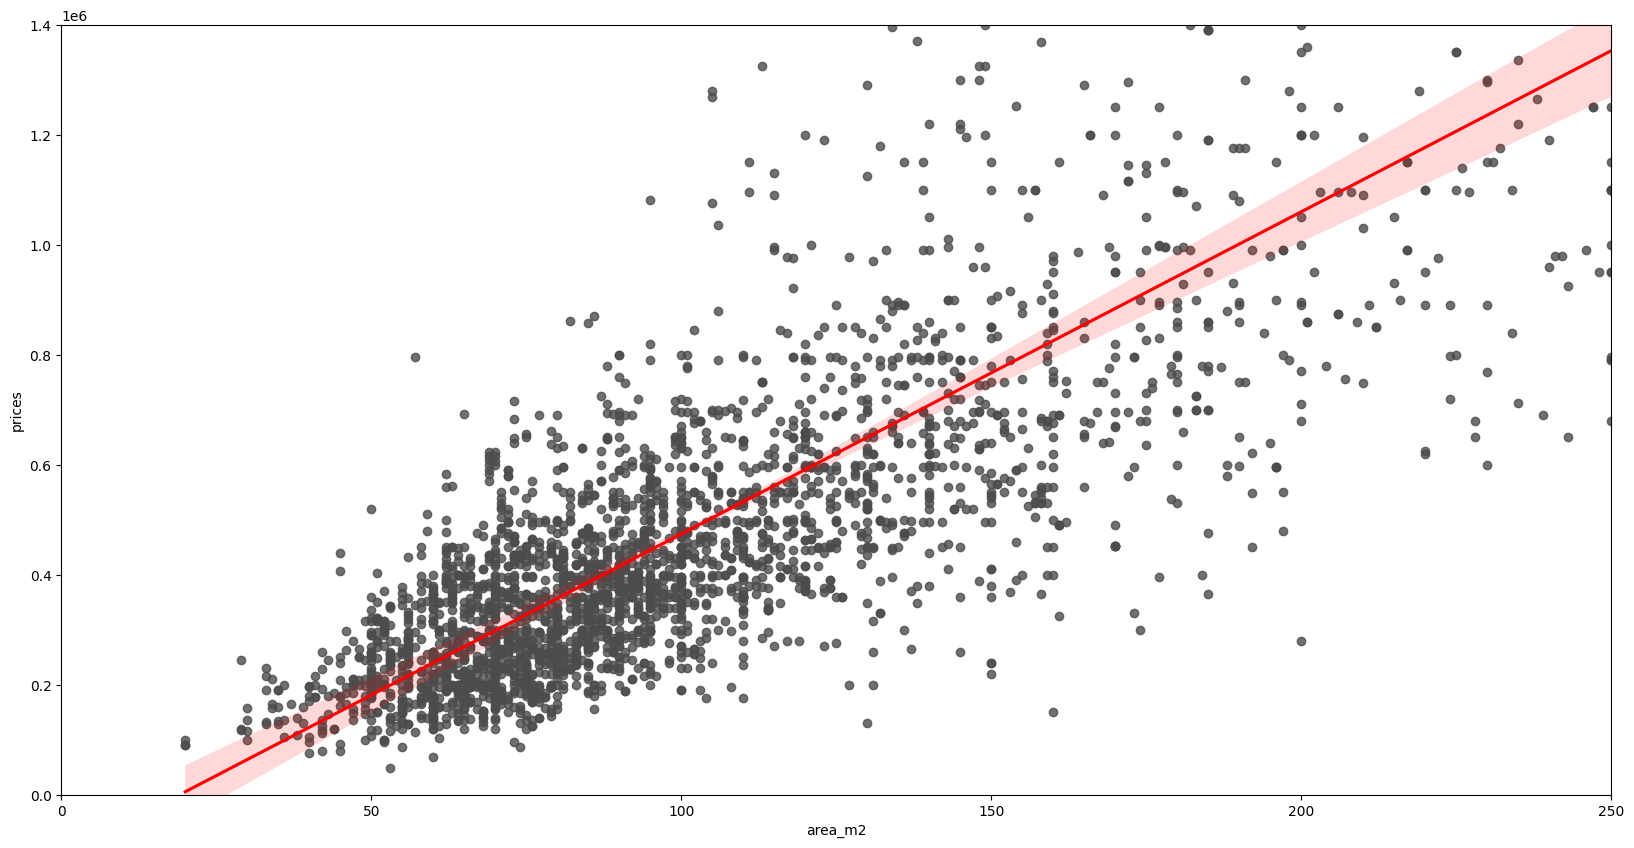

In [8]:
plt.figure(figsize=(20,10))
sns.regplot(data=df,x='area_m2',y='prices',color=".3",line_kws=dict(color="r"))
plt.xlim(0,250)
plt.ylim(0,1400000)
plt.xlabel='m2'
plt.ylabel='Precios'

In [9]:
#Hacemos el cálculo del precio del m2
precio_medio=df['prices'].mean()/df['area_m2'].mean()
precio_medio

4939.020215915246

<h3> Como afecta la condición de la vivienda al precio</h3>
<h4>Distritos caros </h4>

Como podemos ver obviamente las viviendas que necesitan reformas son las más baratas en los distritos caros, la diferencia entre las viviendas en buena condición son un 43% más caras que las nuevas, mientras que la diferencia entre las viviendas en buena condición son solo un 19% más caras que las que necesitan reforma.
Una vivienda nueva te sale un 17% más barata que una que necesita reformas curiosamente y un 43% más barata que comprarte una en buena condición.

<h4> Distritos medios</h4>
En estos distritos las viviendas en buen estado son 9% más caras que las nuevas y 46% más caras que las que necesitan reforma, las viviendas nuevas son 33% más caras que las que necesitan reformas

<h4> Distritos baratos</h4>
En los distritos baratos las viviendas nuevas son 29% más caras que las buenas condición y 56% más caras que las que necesitan reforma, las viviendas en buena condición son 12% más caras que las que necesitan las reformas

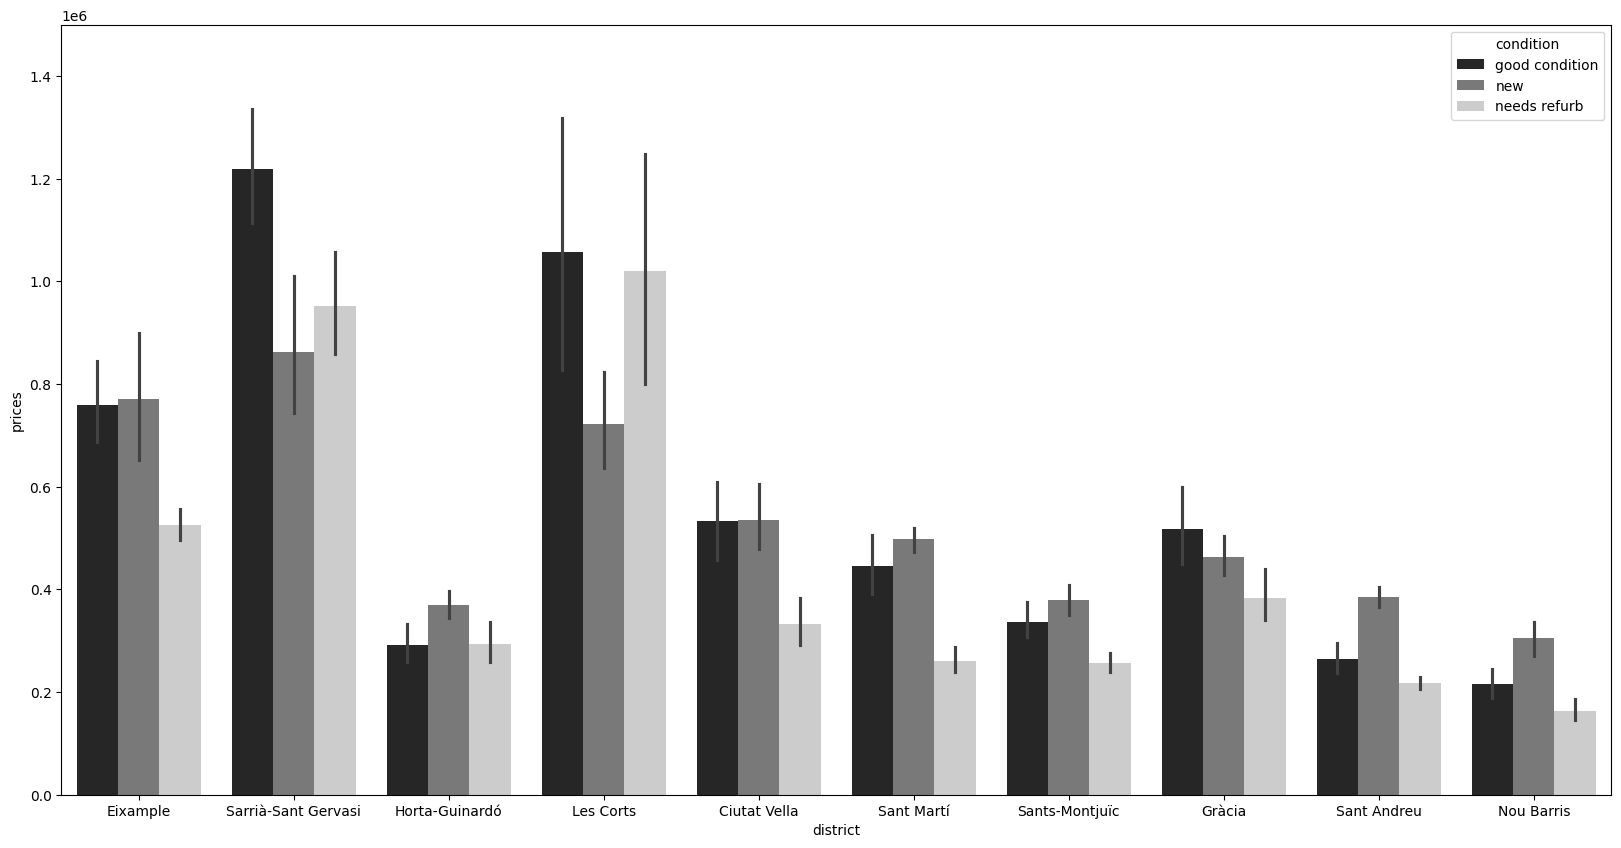

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='district',y='prices',palette='dark:.8',hue='condition')
plt.ylim(0,1500000)
plt.xlabel='m2'
plt.ylabel='Precios'

In [13]:
df_caros_good=df_caros[df_caros['condition']=='good condition']
df_caros_new=df_caros[df_caros['condition']=='new']
df_caros_reform=df_caros[df_caros['condition']=='needs refurb']
#Calculo para la diferencia de precios entre los que están en buena condición y los nuevos 
CarosDifNewGood=df_caros_good['prices'].mean()/df_caros_new['prices'].mean()
#Calculo para la diferencia de precios entre los que están en buena condición y los que necesitan reforma 
CarosDifGoodRef=df_caros_good['prices'].mean()/df_caros_reform['prices'].mean()
#Calculo para la diferencia de precios entre los nuevos y los que necesitan reforma 
CarosDifNewRef=df_caros_new['prices'].mean()/df_caros_reform['prices'].mean()
print(CarosDifNewGood,CarosDifGoodRef,CarosDifNewRef)
sns.barplot

1.4322626231086326 1.197283242801081 0.8359383422311586


<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)>

In [14]:
df_medio_good=df_medio[df_medio['condition']=='good condition']
df_medio_new=df_medio[df_medio['condition']=='new']
df_medio_reform=df_medio[df_medio['condition']=='needs refurb']
#Calculo para la diferencia de precios entre los que están en buena condición y los nuevos 
MedioDifNewGood=df_medio_good['prices'].mean()/df_medio_new['prices'].mean()
#Calculo para la diferencia de precios entre los que están en buena condición y los que necesitan reforma 
MedioDifGoodRef=df_medio_good['prices'].mean()/df_medio_reform['prices'].mean()
#Calculo para la diferencia de precios entre los nuevos y los que necesitan reforma 
MedioDifNewRef=df_medio_new['prices'].mean()/df_medio_reform['prices'].mean()
print(MedioDifNewGood,MedioDifGoodRef,MedioDifNewRef)

1.091458120324175 1.4610649624492433 1.3386358443284023


In [15]:
df_barato_good=df_barato[df_barato['condition']=='good condition']
df_barato_new=df_barato[df_barato['condition']=='new']
df_barato_reform=df_barato[df_barato['condition']=='needs refurb']

#Calculo para la diferencia de precios entre los que están en buena condición y los nuevos 
BaratoDifNewGood=df_barato_good['prices'].mean()/df_barato_new['prices'].mean()
#Calculo para la diferencia de precios entre los que están en buena condición y los que necesitan reforma 
BaratoDifGoodRef=df_barato_good['prices'].mean()/df_barato_reform['prices'].mean()
#Calculo para la diferencia de precios entre los nuevos y los que necesitan reforma 
BaratoDifNewRef=df_barato_new['prices'].mean()/df_barato_reform['prices'].mean()
print(BaratoDifNewGood,BaratoDifGoodRef,BaratoDifNewRef)

0.719024167358776 1.1239747349710623 1.5631946546383964


<h3> Análisis del tipo de casas que hay en  Barcelona</h3> 


### Tipos de casa
Detached: Tipo de casa que no comparte paredes con otras viviendas (Casa aislada). <br>
Semi-detached: Tipo de casa unida a otra vivienda por uno de sus lados (Adosado por un lado).<br>
Terraced: Tipo de casa unida a otras viviendas por ambos lados (Adosado por ambos lados).<br>
Penthouse: Ático, por lo general, lujoso.<br>
Duplex: Tipo de casa con dos pisos (Dúplex).<br>
Flat: Apartamento.<br>
Rustic: Casas situadas en el campo, son construcciones de poca altura de uno o de dos pisos
House: casa/chalet basicamente es un edificio residencia de una solo unidad.

In [16]:
df.groupby('type').mean()

TypeError: agg function failed [how->mean,dtype->object]

#### Media de m2 por tipo de  viveinda
-Flat: 107m2 <br>
-Penthouse: 131m2 <br>
-Terraced: 167m2 <br>
-Duplex: 165m2 <br>
-Detached: 337m2 <br>
-House: 418m2 <br>
-Semi-detached:264m2 <br>
-Rustic: 161m2 <br>


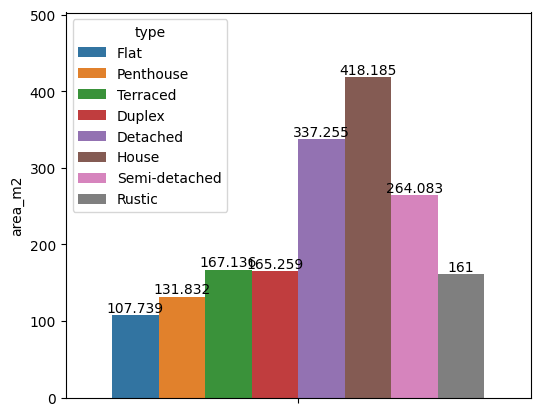

In [ ]:
plt.figure(figsize=(6,5))
barplot=sns.barplot(data=df,y='area_m2',hue='type',err_kws={'linewidth': 0})
for x in range(0,len(pd.unique(df.type))):
    barplot.bar_label(barplot.containers[x], fontsize=10)

#### Media de habitaciones por tipo de  viveinda
-Flat: 3 habitaciones<br>
-Penthouse: 3 habitaciones <br>
-Terraced: 3 habitaciones <br>
-Duplex: 3 habitaciones <br>
-Detached: 5 habitaciones <br>
-House: 5 habitaciones <br>
-Semi-detached:4 habitaciones <br>
-Rustic: 5 habitaciones <br>

<Axes: ylabel='rooms'>

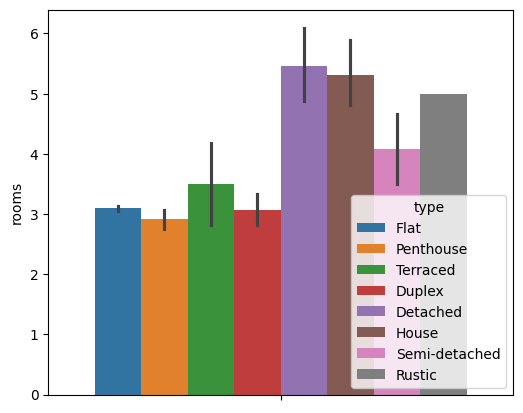

In [17]:
plt.figure(figsize=(6,5))
sns.barplot(data=df,y='rooms',hue='type')

#### Precio medio por tipo de  viveinda
-Flat: 519.000€<br>
-Penthouse: 775.000€ <br>
-Terraced: 587.000€ <br>
-Duplex: 784.000€ <br>
-Detached: 1.506.000€ <br>
-House: 2.483.000€ <br>
-Semi-detached: 1.170.000€ <br>
-Rustic: 490.000€ <br>

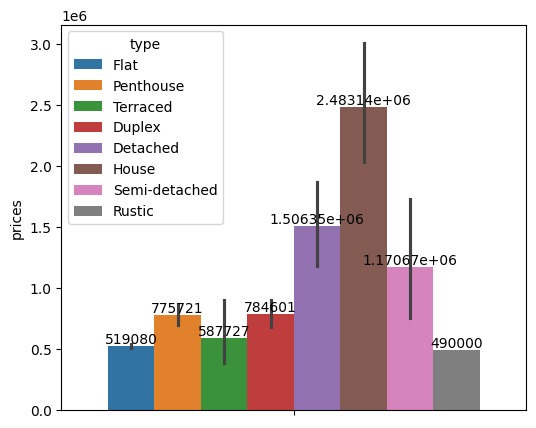

In [18]:
plt.figure(figsize=(6,5))
barplot=sns.barplot(data=df,y='prices',hue='type')
for x in range(0,len(pd.unique(df.type))):
    barplot.bar_label(barplot.containers[x], fontsize=10)

<Axes: xlabel='rooms', ylabel='prices'>

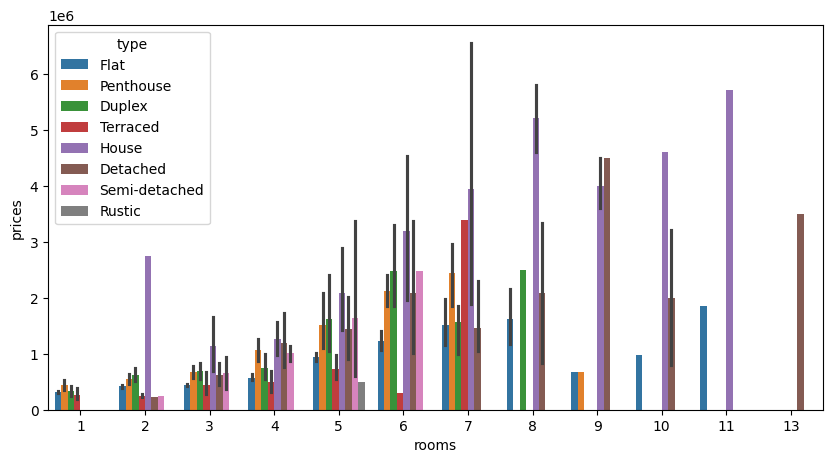

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='rooms',y='prices',hue='type')

#### Diferencia de precios entre los que tienes vistas al exterior o no

Como podemos observar solo hay 3 tipos de vivienda que tengas los 2 tipos de vistas que son el flat, terraced y el duplex.

La diferencia de precios entre los apartamentos con vistas y sin vistas son de un 74% siendo los con vista los que salen más caros. <br>
La diferencia de precios entre las penthouses con vistas y sin vistas son de un 109% siendo los con vista los que salen más caros. <br>
La diferencia de precios entre las duplex con vistas y sin vistas son de un insignificante 1% siendo los sin vista los que salen más caros. <br>


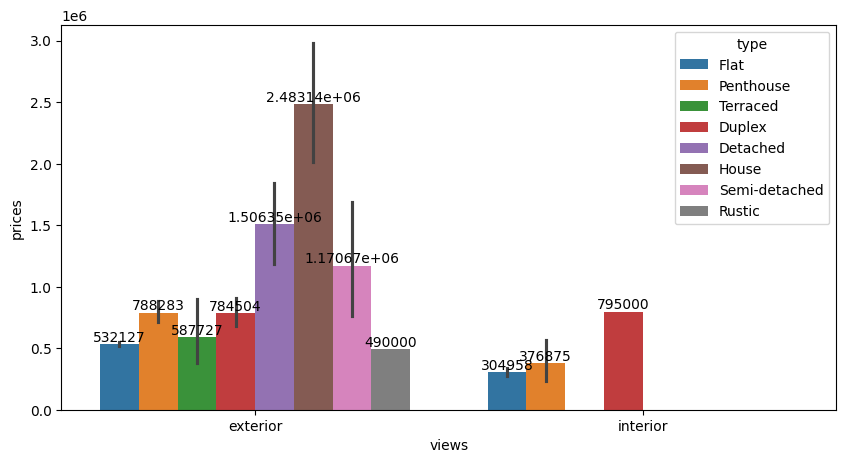

In [20]:
plt.figure(figsize=(10,5))
barplot=sns.barplot(data=df,x='views',y='prices',hue='type')
for x in range(0,len(pd.unique(df.type))):
    barplot.bar_label(barplot.containers[x], fontsize=10)

### Cómo afecta al precio el no tener ascensor en una vivienda

Podemos observar que las únicas viviendas que no tienen ascensor son las que tienen 6 plantas o menos, solo hay 2 de que no tengan ascensor en la sexta planta, por ende no los contaremos debido a la falta de muestra porque que uno de ellos es una penthouse carísima y desvirtúa mucho el precio.
Así que no quedaremos con las viviendas que vayan desde el entresuelo a la planta 5.

Viviendas que se encuentran en la planta 1 y que no tienen ascensor son un 47% más baratas <br>
Viviendas que se encuentran en la planta 2 y que no tienen ascensor son un 48% más baratas <br>
Viviendas que se encuentran en la planta 3 y que no tienen ascensor son un 60% más baratas <br>
Viviendas que se encuentran en la planta 4 y que no tienen ascensor son un 65% más baratas <br>
Viviendas que se encuentran en la planta 5 y que no tienen ascensor son un 48% más baratas <br>
Viviendas que se encuentran en la planta baja y que no tienen ascensor son un 40% más baratas <br>
Viviendas que se encuentran en el entre suelo 3 y que no tienen ascensor son un 40% más baratas <br>

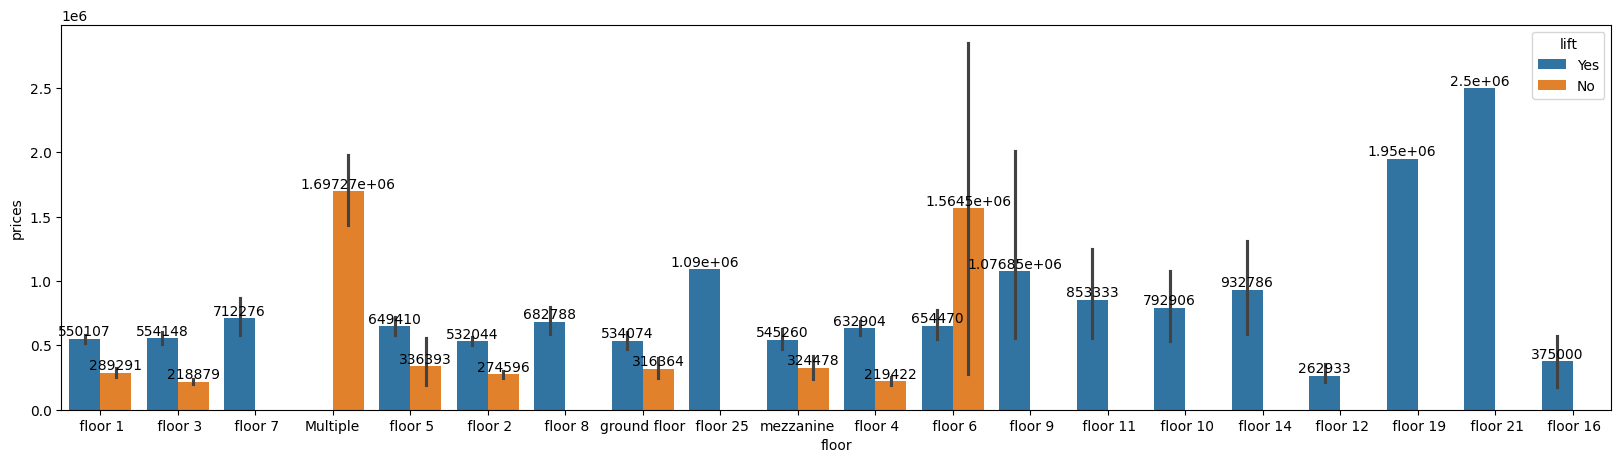

In [21]:
plt.figure(figsize=(20,5))
barplot=sns.barplot(data=df,x='floor',y='prices',hue='lift')
for x in range(0,len(pd.unique(df.lift))):
    barplot.bar_label(barplot.containers[x], fontsize=10)

In [22]:
#Declaramos una lista con las plantas que hay ordenadas y otra vacía para guardar las plantas que tienen viviendas con ascensor y sin ascensor
floors=pd.unique(df.floor)
floors.sort()
floors_ascensor=[]
#Bucle for que recorremos cada planta y comprobaremos si tienen más de 5 viviendas con ascensor y sin ascensor
for x in range(0,len(floors)):
    media_precio=df[(df['floor']==floors[x]) & (df['lift']=='Yes')]
    if media_precio['id'].count()>5:
        media_precio=df[(df['floor']==floors[x]) & (df['lift']=='No')]
        if media_precio['id'].count()>5:
            floors_ascensor.append(floors[x])
print(floors_ascensor)        


[' floor 1', ' floor 2', ' floor 3', ' floor 4', ' floor 5', 'ground floor', 'mezzanine']


In [24]:
#Declaramos 2 listas para guardar las medias de los precios según sus plantas
media_ascensor=[]
media_no_ascensor=[]
#Bucle for para donde llenaremos las listas con las medias de los precios según las plantas y si tienen ascensor o no
for x in range(0,len(floors_ascensor)):
    media_precio=df[(df['floor']==floors_ascensor[x]) & (df['lift']=='Yes')]
    media_ascensor.append(media_precio['prices'].mean())
    media_precio=df[(df['floor']==floors_ascensor[x]) & (df['lift']=='No')]
    media_no_ascensor.append(media_precio['prices'].mean())
#Transformamos las listas en pd.Series para luego transforlas en un Dataframe
df_media_ascensor=pd.Series(media_ascensor)  
df_media_no_ascensor=pd.Series(media_no_ascensor)   
df_prices=pd.DataFrame([media_ascensor,media_no_ascensor],index=['Con ascensor','Sin ascensor'],columns=[' floor 1',' floor 2' ,' floor 3',' floor 4',' floor 5','ground floor','mezzanine'])       
#Ahora mostramos la diferencia de precio porcentual que hay entre las viviendas con ascensor y sin ascensor
df_prices.pct_change()

    

,floor 1,floor 2,floor 3,floor 4,floor 5,ground floor,mezzanine
Con ascensor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sin ascensor,-0.474119,-0.483885,-0.605016,-0.653308,-0.482002,-0.407641,-0.404912


<h3> ¿Cómo afecta la planta al precio? </h3>


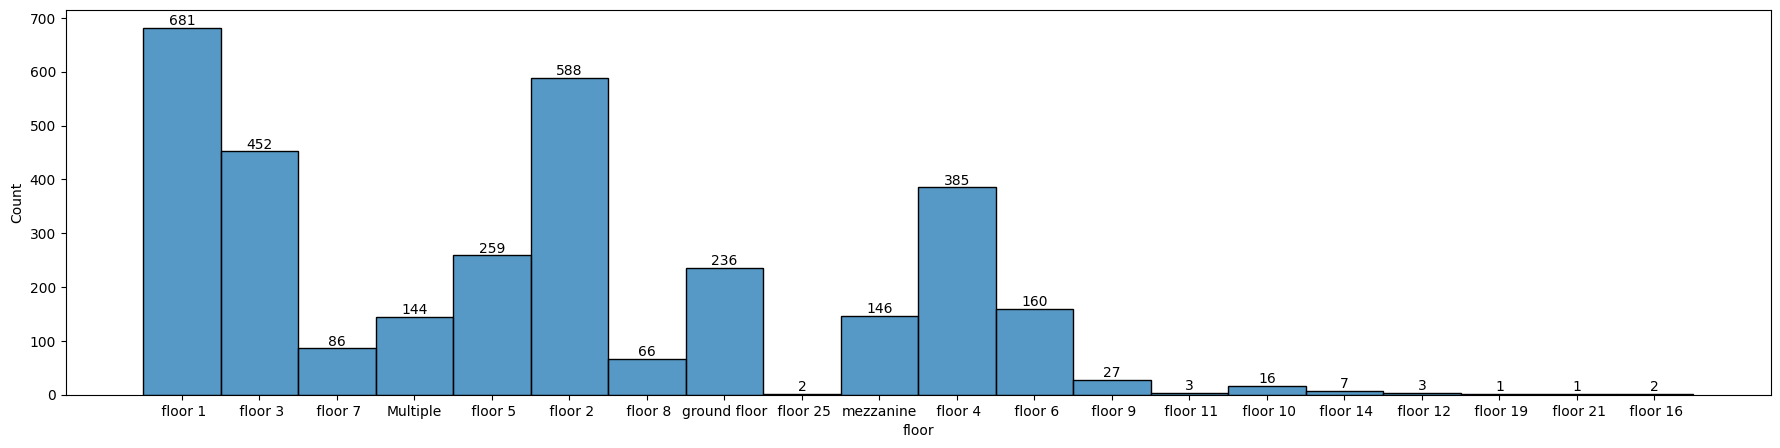

In [25]:
#Bloque de código en el cual mostraremos cuantas viviendas hay en esta planta y nos quedaremos con las plantas donde haya 5 o más viviendas
plt.figure(figsize=(22,5))
histplot=sns.histplot(data=df,x='floor')
#lista donde guadaremos las etiquetas no vacias
labels = []
#Bucle for para quitar las etiquetas vacias
for p in histplot.patches:
    h = p.get_height()
    labels.append(str(h) if h else '')
histplot.bar_label(histplot.containers[0],labels=labels, fontsize=10)
plt.show()

Podemos ver que las plantas 11,12,16 y superiores no hay más de 3 viviendas

(0.0, 14.0)

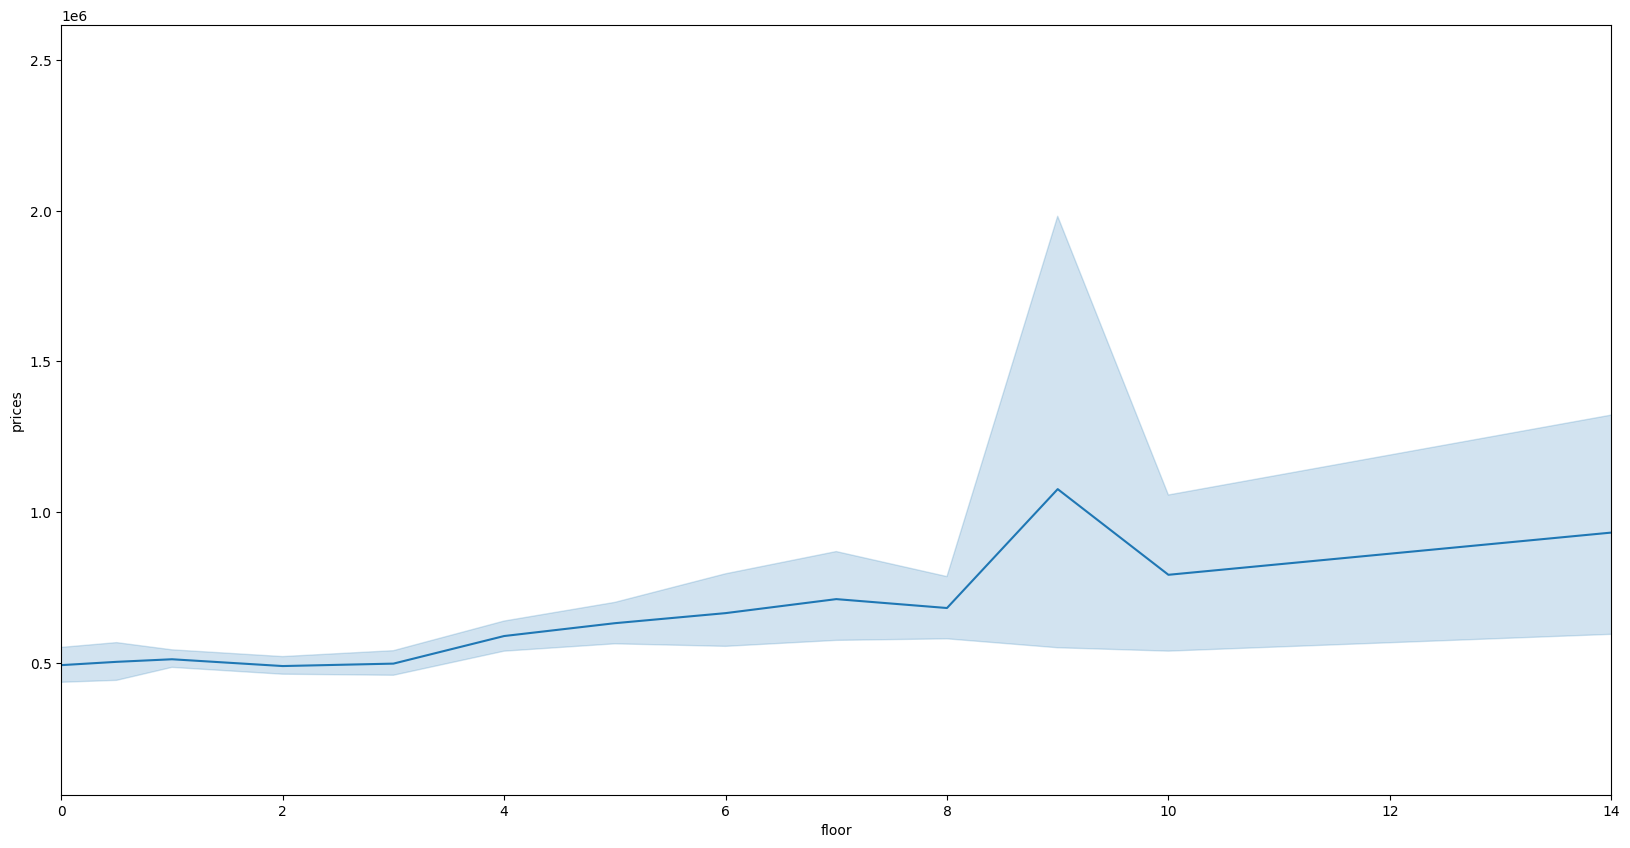

In [26]:
#Hacemos un nuevo dataframe sin la planta multiple 
df_good_new=df[(df['floor']!='Multiple')]
#Pasaremos los valores de string a integer y cogeremos la planta de abajo, la entre suelo, las plantas de 1-10 y la 14 debido a que son las plantas donde tenemos una muestra de más de 5 viviendas
df_good_new=df_good_new.replace(to_replace=['ground floor','mezzanine','Multiple',' floor 1',' floor 2',' floor 3',' floor 4',' floor 5',' floor 6',' floor 7',' floor 8',' floor 9',' floor 10',' floor 11',' floor 12',' floor 14',' floor 16',' floor 19',' floor 21',' floor 25'], value=[0,0.5,99,1,2,3,4,5,6,7,8,9,10,95,96,14,16,19,21,25])
df_good_new=df_good_new.sort_values(by='floor')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_good_new,x='floor',y='prices')
#Limitamos a la planta 14 el gráfico porque es hasta donde nos interesa
plt.xlim(0,14)

Podemos ver como el precio sube ligeramente cuando la vivienda está en una planta más alta, pero aun así no afecta mucho al precio, podríamos decir que no es un factor determinante

<h3> ¿Cómo afecta el número de habitaciones al precio? </h3>

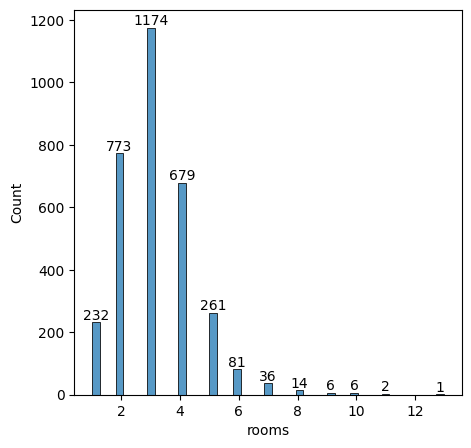

In [27]:
plt.figure(figsize=(5,5))
histplot=sns.histplot(data=df,x='rooms')
#lista donde guadaremos las etiquetas no vacias
labels = []
#Bucle for para quitar las etiquetas vacias
for p in histplot.patches:
    h = p.get_height()
    labels.append(str(h) if h else '')
histplot.bar_label(histplot.containers[0],labels=labels, fontsize=10)
plt.show()

Como podemos ver la mayoría de viviendas tienen entre 1 y 5 habitaciones.

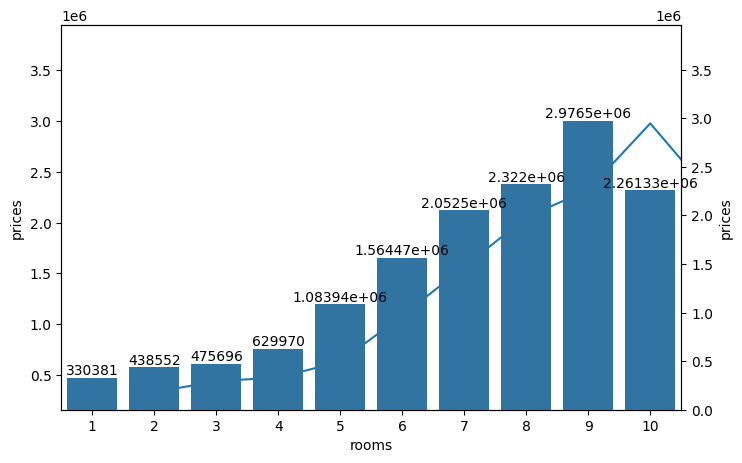

In [28]:
#En este bloque de código imprimiremos 2 gráficas en 1
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(8,5))
#declaramos la primera gráfica que será un lineplot
sns.lineplot(x=df['rooms'],y=df['prices'], ax=ax1,errorbar=None)
#utilizamos la función twinx para juntar las 2 gráficas
ax2 = ax1.twinx()
#declaramos la segunda gráfica, en este caso será un barplot
barplot=sns.barplot(x=df['rooms'],y=df['prices'],ax=ax2,errorbar=None)
#limite de x irá hasta las 10 habitaciones porque de ahí en adelante no tenemos la suficiente muestra para sacar conclusiones veraces 
plt.xlim(-0.5,9.5)
for x in range(0,1):
    barplot.bar_label(barplot.containers[x], fontsize=10)


Como hemos podido observar cuando van de viviendas de 1 habitacion a 4 habitaciones el incremiento del precio es notable entre un 20% y 30% sin embargo si nos vamos a viviendas con 5 o más habitaciones el precio incrementa potencialmente    

<Axes: xlabel='area_m2', ylabel='Count'>

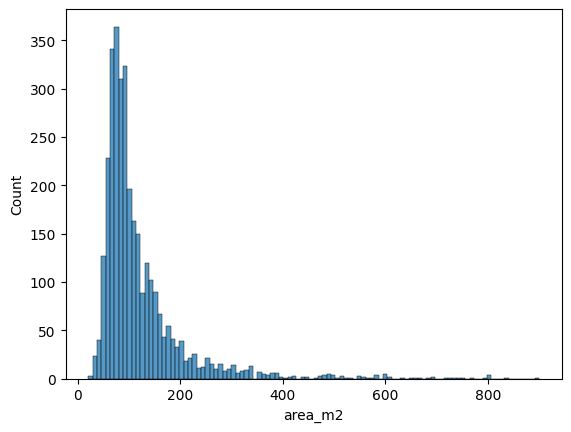

In [29]:
sns.histplot(data=df,x='area_m2')

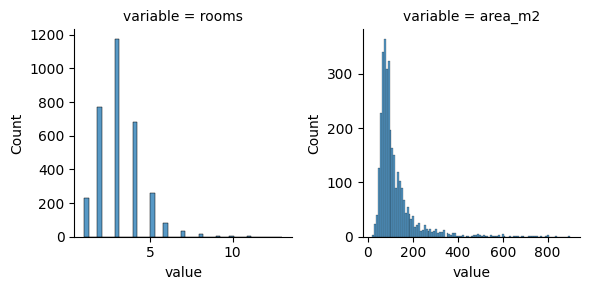

In [54]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

(0.0, 3000000.0)

<Figure size 1500x1500 with 0 Axes>

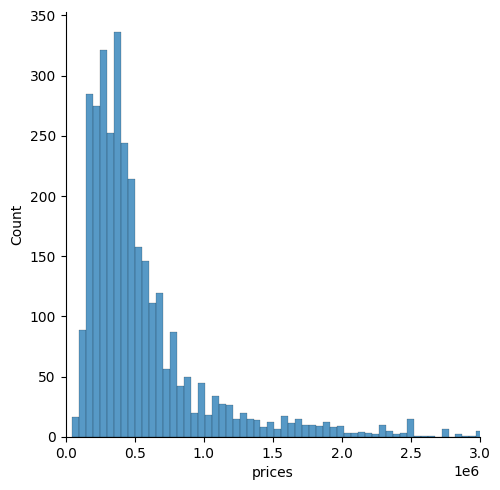

In [30]:
plt.figure(figsize=(15,15))
sns.displot(data=df,x='prices')
plt.xlim(0,3000000)

<h3>Correlación </h3>
Ahora vamos a comprobar que relación tienen los siguientes atributos con el precio de las viviendas

In [83]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'prices']].groupby(feature).mean()['prices']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['city_E', 'district_E', 'neighborhood_E', 'condition_E', 'type_E', 'lift_E', 'views_E', 'floor_E']


c:\Estudis\ML\anaconda3\envs\AI\lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


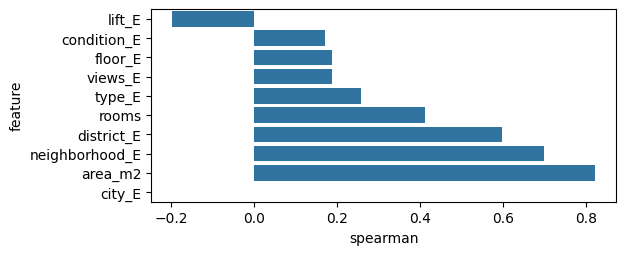

In [84]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['prices'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df, features)

Podemos ver que los atributos que mayormente influyen en el precio son los metros cuadrados que tiene las viviendas, seguido de la ubicación en la que se encuentra, el número de habitaciones, el tipo de vivienda, vistas, planta en la que se encuentra la vivienda, condición del habitáculo y si tienes ascensor o no.

In [31]:
df.select_dtypes(exclude = ["object"]).columns

Index(['id', 'rooms', 'area_m2', 'prices'], dtype='object')

In [31]:
#Función para hacer un diccionario con un número los tipos únicos de cada columna
def conversion(diccionario,lista):
    for i in range(len(neighborhood)):
        Dictneighborhood.update({i:neighborhood[i]}) 
#Inicializamos los diccionarios        
Dictneighborhood = {}
DictDistrict = {}
DictCondition={}
DictType={}
DictFloor={}
#Hago un array de los tipos únicos que hay en cada columna 
neighborhood=pd.unique(df.neighborhood)
district=pd.unique(df.district)
condition=pd.unique(df.condition) 
Type=pd.unique(df.Type)
floors=pd.unique(df.floors)
#Llamos a la función conversión
conversion(Dictneighborhood,neighborhood)
conversion(DictDistrict,district)
conversion(DictCondition,condition)
conversion(DictType,Type)
conversion(DictFloor,floors)

{0: "la Dreta de l'Eixample", 1: 'Sant Gervasi - Galvany', 2: 'Sant Antoni', 3: 'Can Baró', 4: 'el Fort Pienc', 5: 'la Sagrada Família', 6: "la Nova Esquerra de l'Eixample", 7: 'Pedralbes', 8: 'Sant Pere - Santa Caterina i la Ribera', 9: 'el Guinardó', 10: "l'Antiga Esquerra de l'Eixample", 11: 'el Poblenou', 12: 'les Corts', 13: 'Sant Gervasi - la Bonanova', 14: 'el Poble Sec - AEI Parc de Montjuïc', 15: 'el Barri Gòtic', 16: 'la Vila de Gràcia', 17: 'el Congrés i els Indians', 18: 'la Vila Olímpica del Poblenou', 19: 'Sant Martí de Provençals', 20: 'el Clot', 21: "el Camp de l'Arpa del Clot", 22: 'la Bordeta', 23: "el Camp d'en Grassot i Gràcia Nova", 24: 'Sarrià', 25: 'el Carmel', 26: 'la Maternitat i Sant Ramon', 27: 'el Putxet i el Farró', 28: 'el Raval', 29: 'Vallvidrera - el Tibidabo i les Planes', 30: 'les Tres Torres', 31: 'el Besòs i el Maresme', 32: "la Font d'en Fargues", 33: 'Provençals del Poblenou', 34: 'Vallcarca i els Penitents', 35: 'Diagonal Mar i el Front Marítim de

In [34]:
#Eliminamos las celdas que son formato string menos la de lift
df.drop(['id','city',],axis=1,inplace=True)
df.head(5)

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


In [ ]:
#Cambiamos los valores de la columna lift de string a booleano
df['lift']=df['lift'].map({
    'Yes':1,
    'No':0
})
df['views']=df['exterior'].map({
    'exterior':1,
    'interior':0
})
df.head(5)

,rooms,area_m2,lift,prices
0,3,351,1,2300000
1,5,298,1,1750000
2,2,90,1,590000
3,2,130,1,450000
4,3,110,0,430000


In [ ]:
#usaremos el modelo de regresión lineal para predecir el precio de una casa
reg = linear_model.LinearRegression()
reg.fit(df.drop('prices',axis='columns'),df.prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Ahora hacemos una predicción para comprobar como funciona, la primera casilla es el número de habitaciones
#la segunda casilla son los m2 de la vivienda y la Tercera un booleano de si tiene ascensor
reg.predict([[4,120,1]])

array([552005.25990284])

<h5> Exportamos el modelo </h5>

In [ ]:
from sklearn.externals import joblib
joblib.dump(reg, 'modelo_predecir_vivenda_BCN')

['modelo_predecir_vivenda_BCN']